# **Movie review (text classification) using BI-LSTM on the IMDB dataset**

[Reference](https://www.analyticsvidhya.com/blog/2022/01/tutorial-on-rnn-lstm-gru-with-implementation/)

In [1]:

'''
Implementation
We are going to perform a movie review (text classification) using BI-LSTM on the IMDB dataset.
The goal is to read the review and predict if the user liked it or not.
'''
#Importing Libraries
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import  Dense, Embedding, LSTM, Bidirectional


2. Importing the dataset

Loading IMDB standard dataset using the Keras dataset class.

#signifies that only 10000 unique words will be taken for our dataset.

#x_train, x_test: List of movie reviews text data. having an uneven length.

#y_train, y_test: Lists of integer target labels (1 or 0).

In [2]:
from keras.datasets import imdb
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=10000)
num_words = 10000

17464789/17464789 [==============================] - 1s 0us/step


# **3. Feature Extraction**


Since we have text data in x_train and x_test of having an uneven length. Our goal is to convert this text data into a numerical form in order to feed it into the model.

Make the length of texts equal using padding.

We are defining max_len = 200. If a sentence is having a length greater than 200 it will be trimmed off otherwise it will be padded by 0.

In [5]:
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
y_test = np.array(y_test)
y_train = np.array(y_train)

4. Designing the Bi-directional LSTM

The way we will be defining our bidirectional LSTM will be the same for LSTM as well.

You can either use Sequential or Functional API to create the model. here we are using Sequential API.

input_length = maxlen Since we have already made all sentences in our dataset have an equal length of 200 using pad_sequence.
The Embedding layer takes n_unique_words as the size of the vocabulary in our dataset which we already declared as 10000.
After the Embedding layer, we are adding Bi-directional LSTM units.
Using sigmoid activation and then compiling the model

In [8]:
n_unique_words =10000
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **5. Training the model**

We have prepared our dataset and model not calling the fit method to train our model.

In [12]:
history=model.fit(x_train, y_train,
           batch_size=32,
           epochs=3,
           validation_data=[x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/3
782/782 [==============================] - 306s 390ms/step - loss: 0.3932 - accuracy: 0.8302 - val_loss: 0.3143 - val_accuracy: 0.8703
Epoch 2/3
782/782 [==============================] - 297s 380ms/step - loss: 0.2504 - accuracy: 0.9043 - val_loss: 0.3342 - val_accuracy: 0.8671
Epoch 3/3
782/782 [==============================] - 297s 380ms/step - loss: 0.1910 - accuracy: 0.9284 - val_loss: 0.3704 - val_accuracy: 0.8693
[0.39321058988571167, 0.2503964602947235, 0.19096505641937256]
[0.83024001121521, 0.9042800068855286, 0.9283999800682068]


Please increase the no of epochs to 12 and see what happens?

# **6. Result**

The plotting result can tell us how effective our training was. Let’s plot the training results.

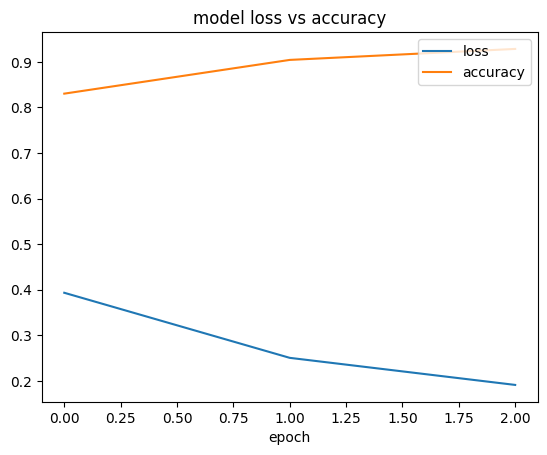

In [13]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()

The accuracy line is nearly touching the one and loss is minimum very close to zero